## Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix
from sklearn.model_selection import train_test_split

C:\Users\spard\DEMO\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
h=pd.read_csv('C://Users//spard//OneDrive//Documents//soham/HousingPrices-Amsterdam-August-2021.csv', encoding = 'ISO-8859-1',index_col=0)

In [3]:
h

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [4]:
h.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


## Check for missing values

In [5]:
h.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

## remove null value 

In [6]:
h.dropna(inplace=True)

In [7]:
h.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [8]:
h.isnull().sum()

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

## check outliers 

C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

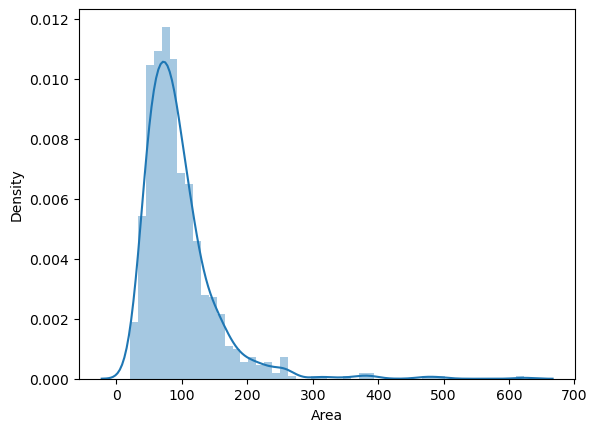

In [9]:
sns.distplot(h['Area'])

C:\Users\spard\DEMO\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

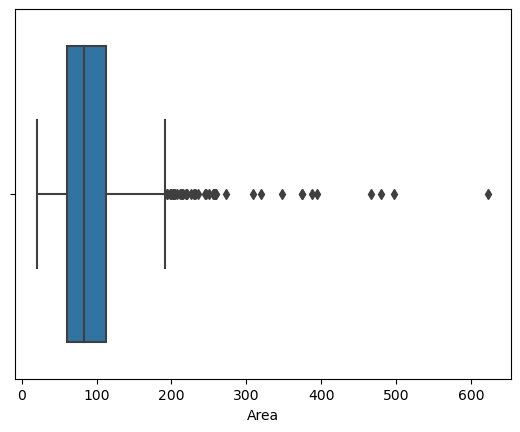

In [10]:
sns.boxplot(h['Area'])

## Remove outliers 

In [11]:
ul=h['Area'].mean()+3*h['Area'].std()
ll=h['Area'].mean()-3*h['Area'].std()
ul,ll

(266.1567062910073, -74.94148889970296)

In [12]:
new_h=h.loc[(h['Area']<ul) & (h['Area']>ll)]
len(h),len(new_h)

(920, 908)

C:\Users\spard\DEMO\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

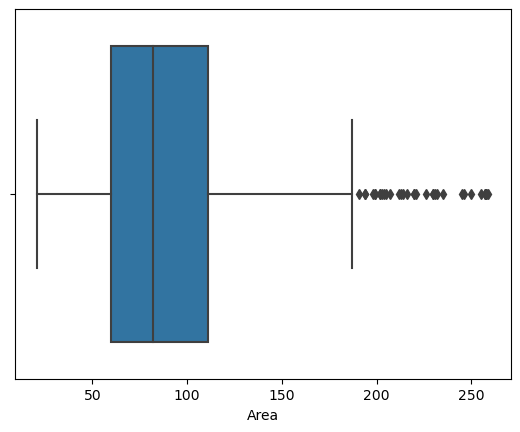

In [13]:
sns.boxplot(new_h['Area'])

In [14]:
new_h=h.copy()
new_h.loc[(new_h['Area']>ul), 'Area']=ul
new_h.loc[(new_h['Area']<ll), 'Area']=ll

C:\Users\spard\DEMO\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

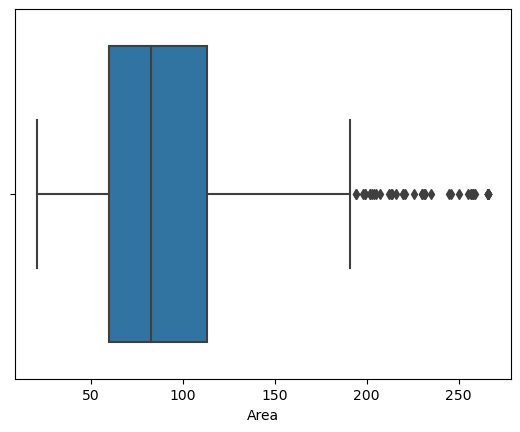

In [15]:
sns.boxplot(new_h['Area'])

In [16]:
x=new_h.iloc[:,3:]
y=new_h.iloc[:,2]

## split dataset into training and testing set 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=123)

## Feature selection: Correlation matrix 

In [18]:
corrmatrix=x_train.corr()

In [19]:
corrmatrix

,Area,Room,Lon,Lat
Area,1.000000,0.776071,0.019360,0.010721
Room,0.776071,1.000000,-0.035548,-0.015405
Lon,0.019360,-0.035548,1.000000,-0.170092
Lat,0.010721,-0.015405,-0.170092,1.000000


<AxesSubplot:>

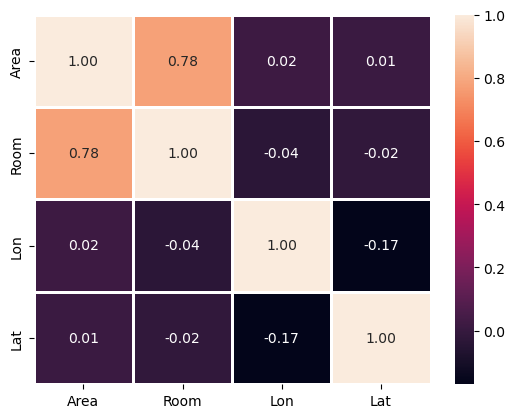

In [20]:
sns.heatmap(corrmatrix,fmt = '.2f',
            linewidths = 2,
            annot = True)

## Model selection: Random Forest Regression 

In [21]:
model=RandomForestRegressor(n_estimators=50)

In [22]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [23]:
model.score(x_test,y_test)

0.7052659096109204

In [24]:
y_pred=model.predict(x_test)

## Prediction for new data points 

In [25]:
model.predict(np.array([[74,5,4.98765,52.34567]]))

C:\Users\spard\DEMO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([373601.4])

In [26]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [27]:
mse,rmse

(59511823120.05644, 243950.45218252097)

In [28]:
mae=mean_absolute_error(y_test,y_pred)

In [29]:
mae

111917.19206521739

## dataframes of actual and predicted dataset 

In [30]:
ap=pd.DataFrame(data={'actual':y_test,'predicted':y_pred})
ap

,actual,predicted
212,550000.0,700176.00
190,600000.0,669600.00
251,475000.0,437001.78
8,590000.0,545200.00
583,775000.0,733760.00
...,...,...
263,1350000.0,1208820.00
14,575000.0,564100.00
76,335000.0,341100.00
187,300000.0,310700.00


<Figure size 1000x800 with 0 Axes>

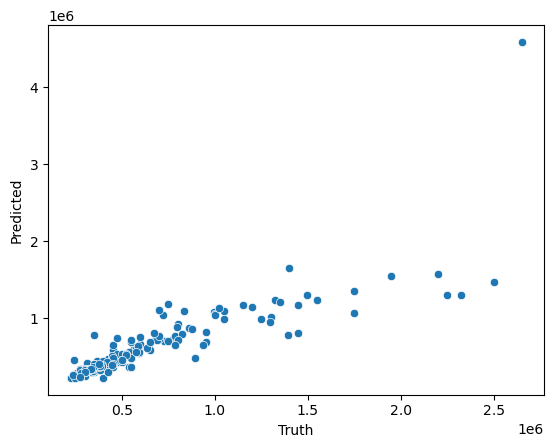

<Figure size 1000x800 with 0 Axes>

In [31]:
sns.scatterplot(x="actual",y='predicted',data=ap)
plt.ylabel('Predicted')
plt.xlabel('Truth')
plt.figure(figsize=(10,8))

C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


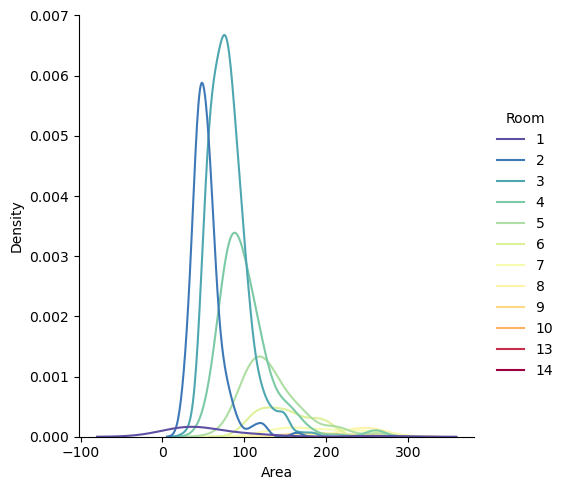

In [32]:
sns.displot(x='Area',data=new_h,palette='Spectral_r',hue='Room',kind='kde')

<AxesSubplot:xlabel='Price', ylabel='Proportion'>

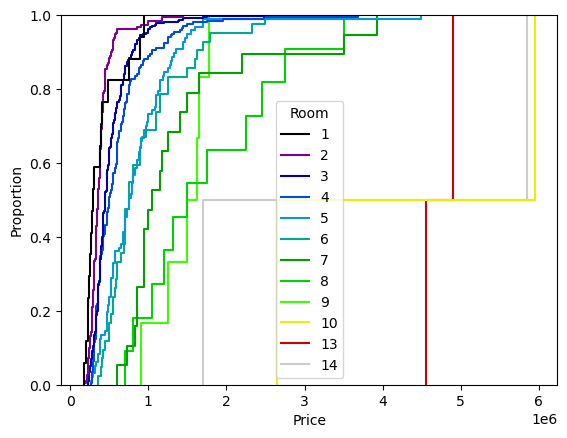

In [33]:
sns.ecdfplot(x='Price',data=new_h,palette='nipy_spectral',hue='Room')

<AxesSubplot:xlabel='Price', ylabel='Area'>

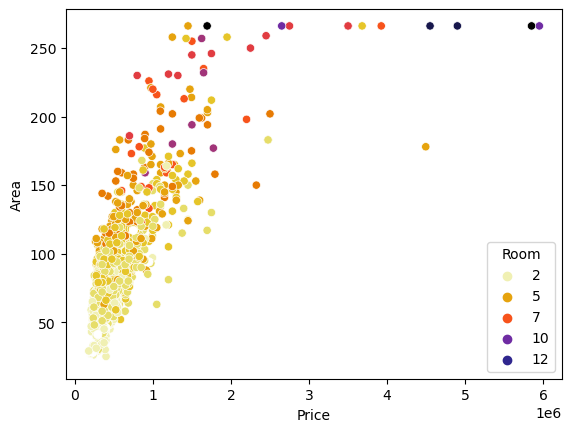

In [34]:
sns.scatterplot(x='Price',y='Area',hue='Room',data=new_h,palette='CMRmap_r')

C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Lon', ylabel='Area'>

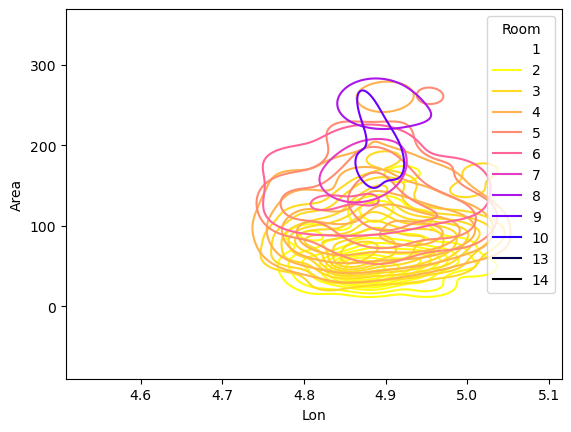

In [35]:
sns.kdeplot(x='Lon',y='Area',hue='Room',data=new_h,palette='gnuplot2_r')

<AxesSubplot:xlabel='Room', ylabel='Lat'>

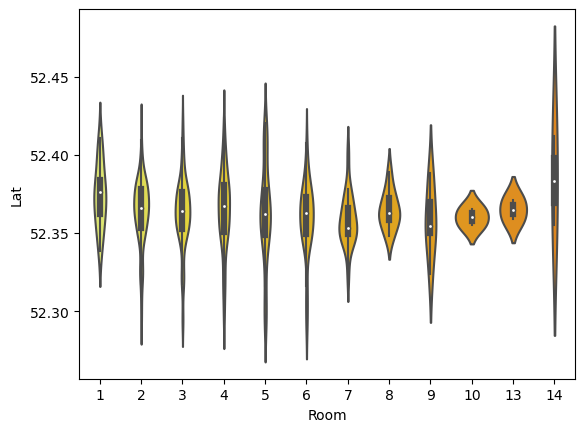

In [36]:
sns.violinplot(x='Room',y='Lat',data=new_h,palette='Wistia')

<AxesSubplot:xlabel='Room', ylabel='Lon'>

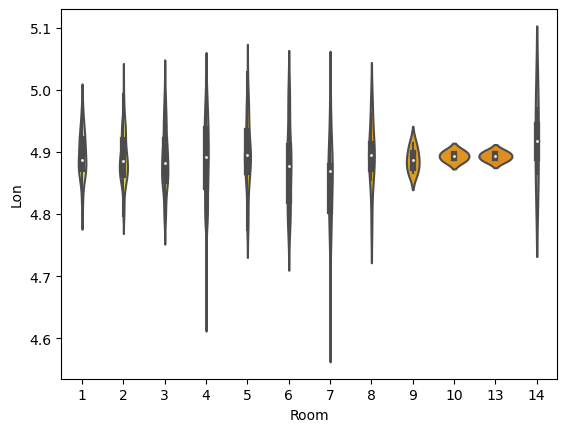

In [37]:
sns.violinplot(x='Room',y='Lon',data=new_h,palette='Wistia')

<AxesSubplot:xlabel='Lon', ylabel='Price'>

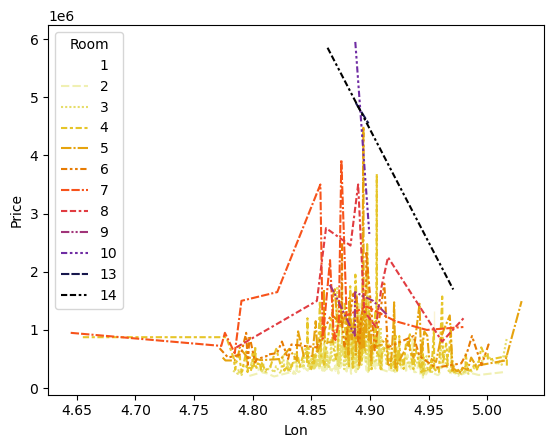

In [38]:
sns.lineplot(x='Lon',y='Price',hue='Room',data=new_h,legend='full',palette='CMRmap_r',style='Room')

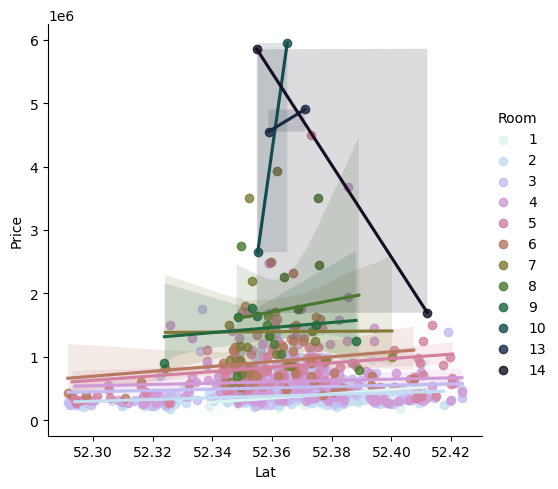

In [39]:
sns.lmplot(x='Lat',y='Price',hue='Room',data=new_h,palette='cubehelix_r')

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

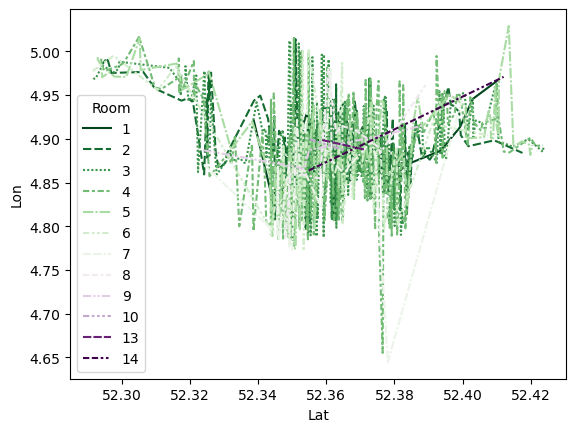

In [40]:
sns.lineplot(x='Lat',y='Lon',hue='Room',data=new_h,legend='full',palette='PRGn_r',style='Room')

<AxesSubplot:xlabel='Room', ylabel='count'>

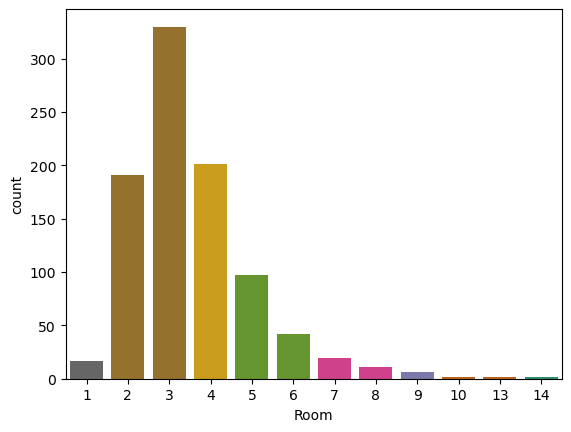

In [41]:
sns.countplot(x="Room",data=new_h,palette='Dark2_r')

C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Room', ylabel='Area'>

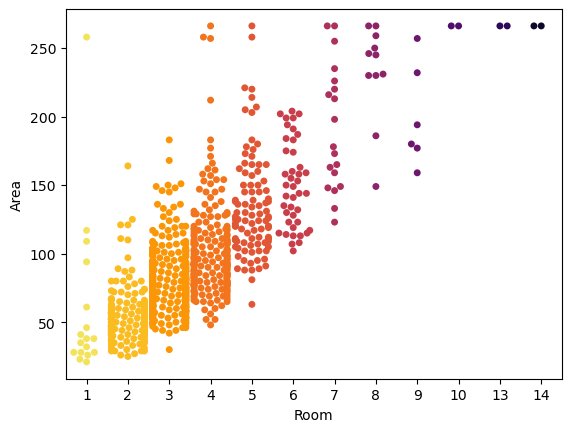

In [42]:
sns.swarmplot(x='Room',y='Area',data=new_h,palette='inferno_r')

C:\Users\spard\DEMO\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


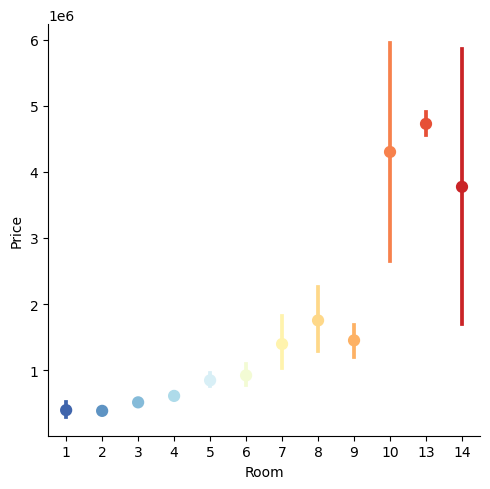

In [43]:
sns.factorplot(x='Room',y='Price',data=new_h,palette='RdYlBu_r')

C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\spard\DEMO\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


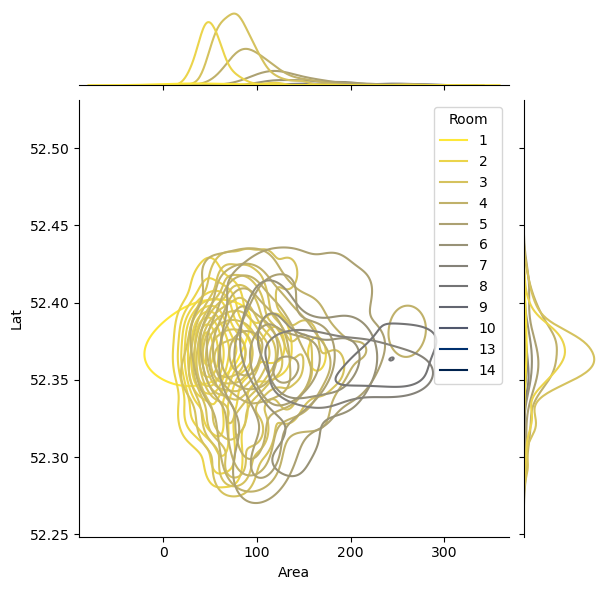

In [44]:
sns.jointplot(y="Lat",x='Area',data=new_h,hue='Room',palette='cividis_r',kind='kde')

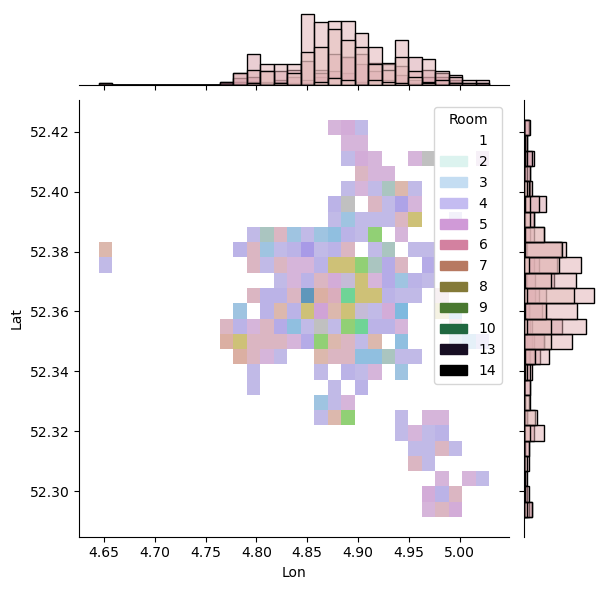

In [45]:
sns.jointplot(y="Lat",x='Lon',data=new_h,hue='Room',palette='cubehelix_r',kind='hist')

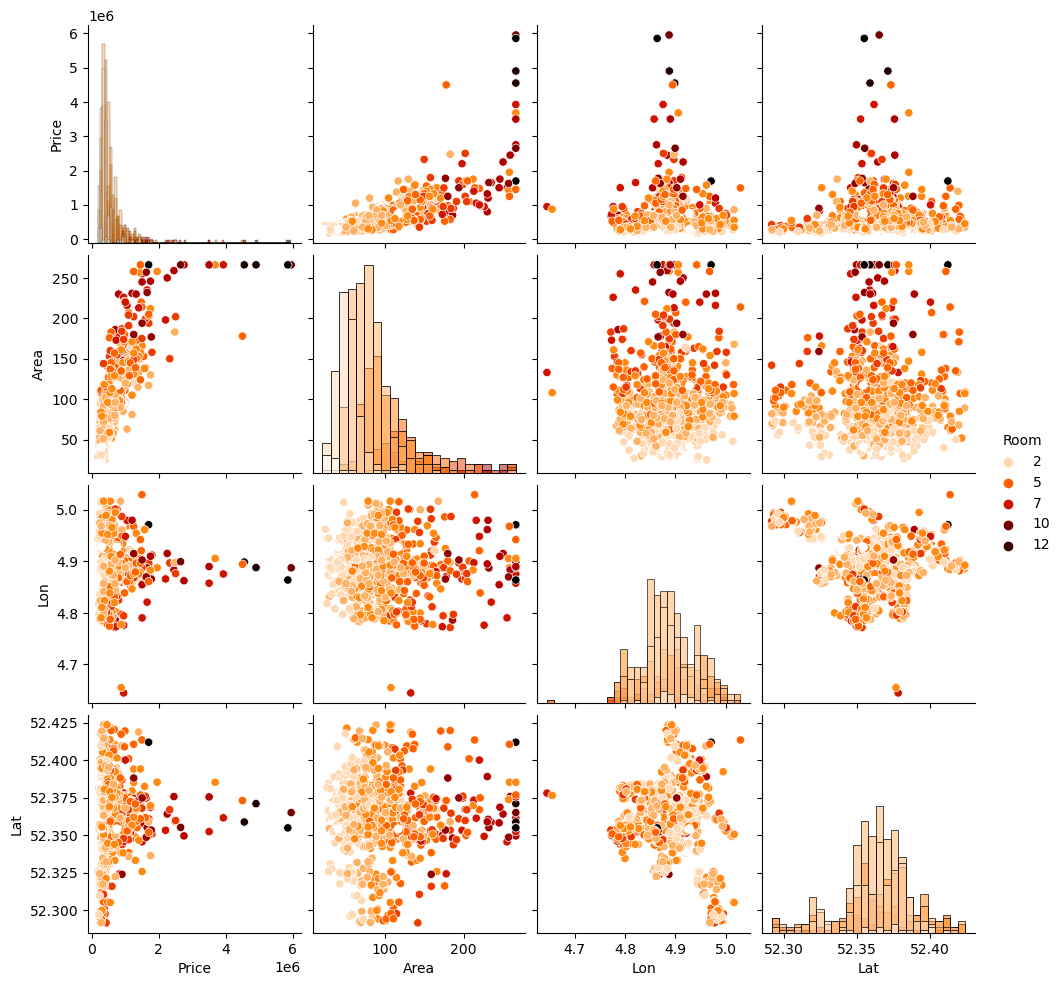

In [46]:
sns.pairplot(data=new_h,hue='Room',palette='gist_heat_r',diag_kind='hist')